### 구글 검색으로 그라운딩

In [4]:
from google import genai
from google.genai import types

# Configure the client
client = genai.Client()

# Define the grounding tool
grounding_tool = types.Tool(google_search=types.GoogleSearch())

# Configure generation settings
config = types.GenerateContentConfig(tools=[grounding_tool])

# Make the request
response = client.models.generate_content(
    model="gemini-2.5-flash",
    #contents="유로2024의 우승팀은?",
    contents="2025년 8월 10일의 서울의 최고기온은?",
    config=config,
)

# Print the grounded response
print(response.text)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


2025년 8월 10일 서울의 최고기온은 33도였습니다.


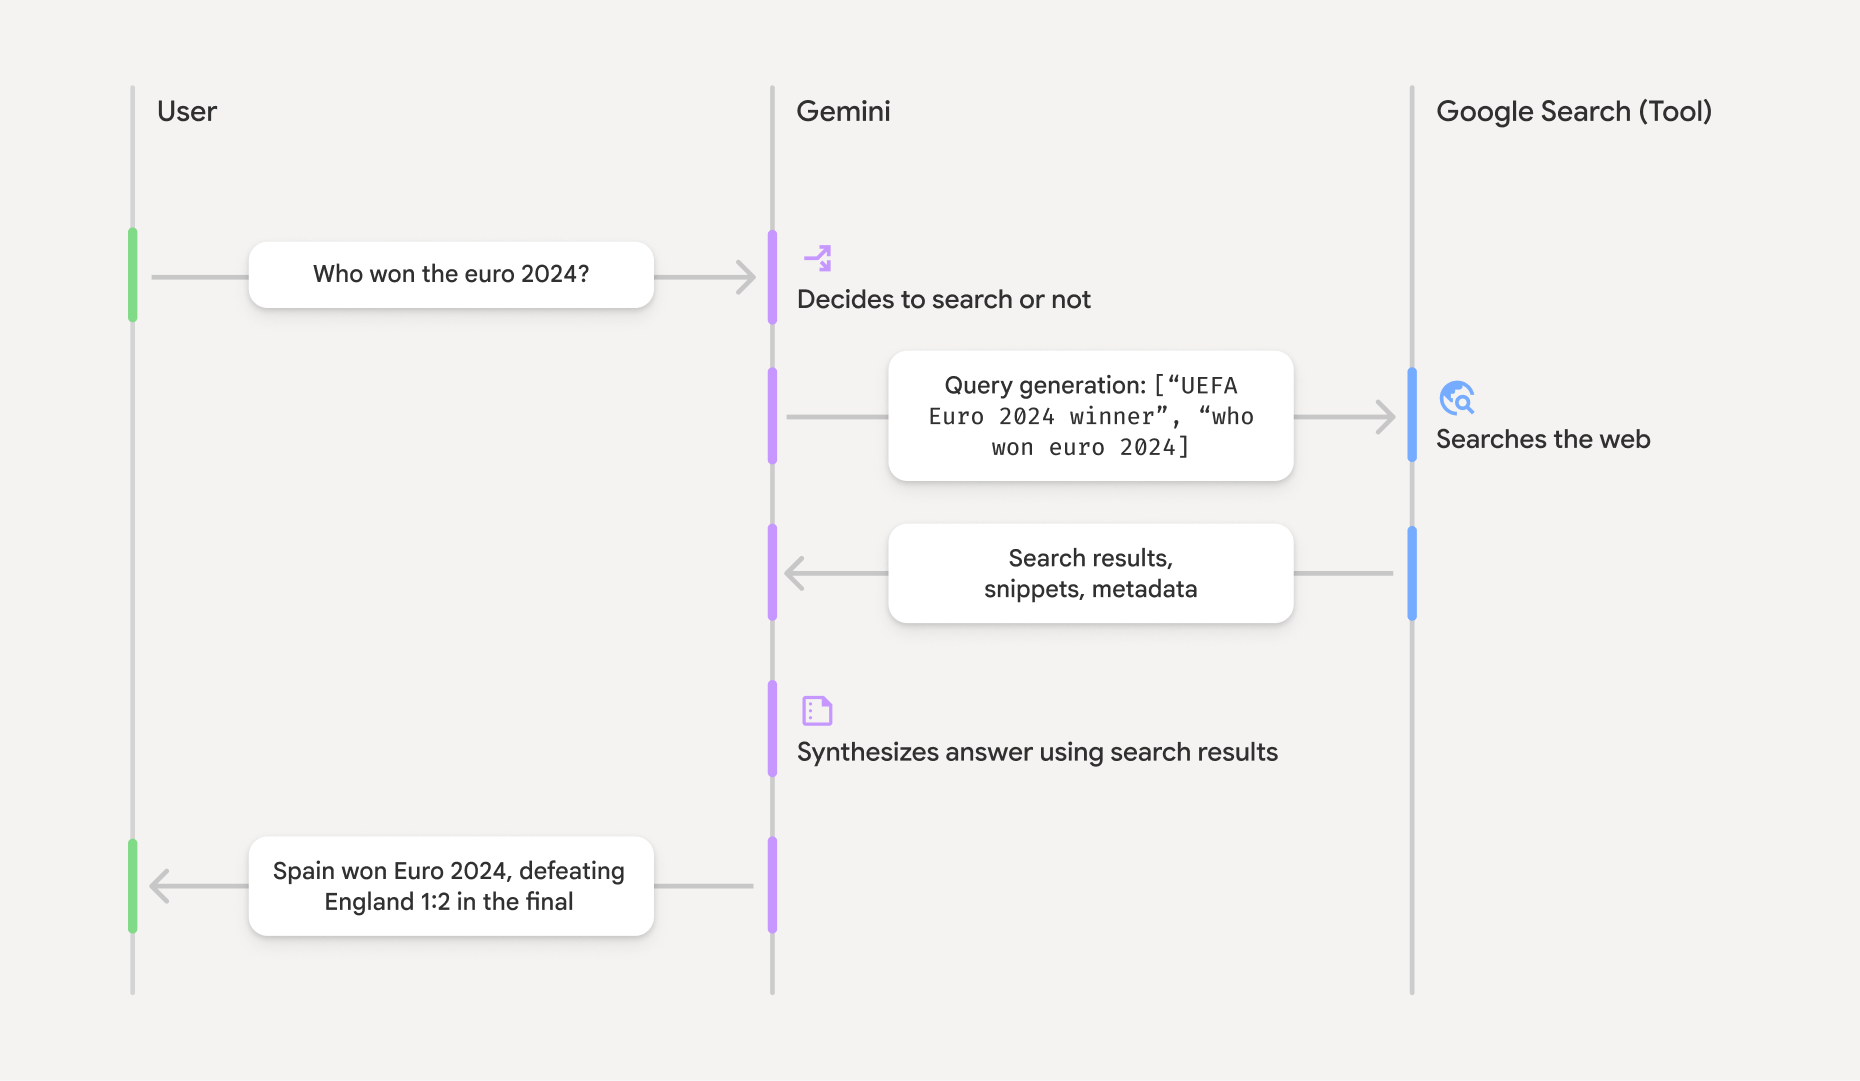

In [5]:
def add_citations(response):
    text = response.text
    supports = response.candidates[0].grounding_metadata.grounding_supports
    chunks = response.candidates[0].grounding_metadata.grounding_chunks

    # Sort supports by end_index in descending order to avoid shifting issues when inserting.
    sorted_supports = sorted(supports, key=lambda s: s.segment.end_index, reverse=True)

    for support in sorted_supports:
        end_index = support.segment.end_index
        if support.grounding_chunk_indices:
            # Create citation string like [1](link1)[2](link2)
            citation_links = []
            for i in support.grounding_chunk_indices:
                if i < len(chunks):
                    uri = chunks[i].web.uri
                    citation_links.append(f"[{i + 1}]({uri})")

            citation_string = ", ".join(citation_links)
            text = text[:end_index] + citation_string + text[end_index:]

    return text


# Assuming response with grounding metadata
text_with_citations = add_citations(response)
print(text_with_citations)

2025년 8월 10일 서울의 최고기온은 33도였습니다.[1](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEGr0nvqqtsZh1dKKEyH0JhHYPGdadRAAHq_YCATFAS75BsG6BQRjOGJVpD3zAcMI2SytREiyVeWKgS62tTsgCuE1CClC4Dv5yRGnFnHA887H3JQvV5yQDJBhdp2d_fP4dAb0YtirA=)
